<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Data PreProcessing</h3>
    <h4 align="center"><a href="https://github.com/AliBinary">Ali Ghanbari</a></h5>
</div>

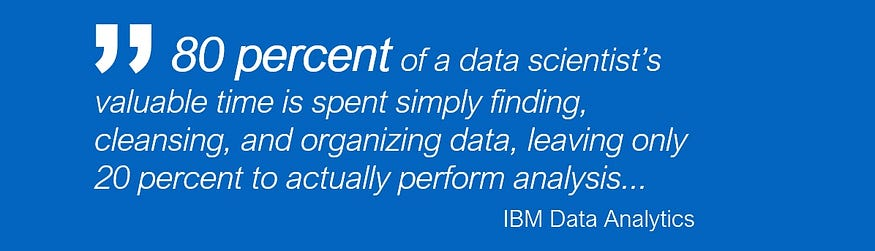

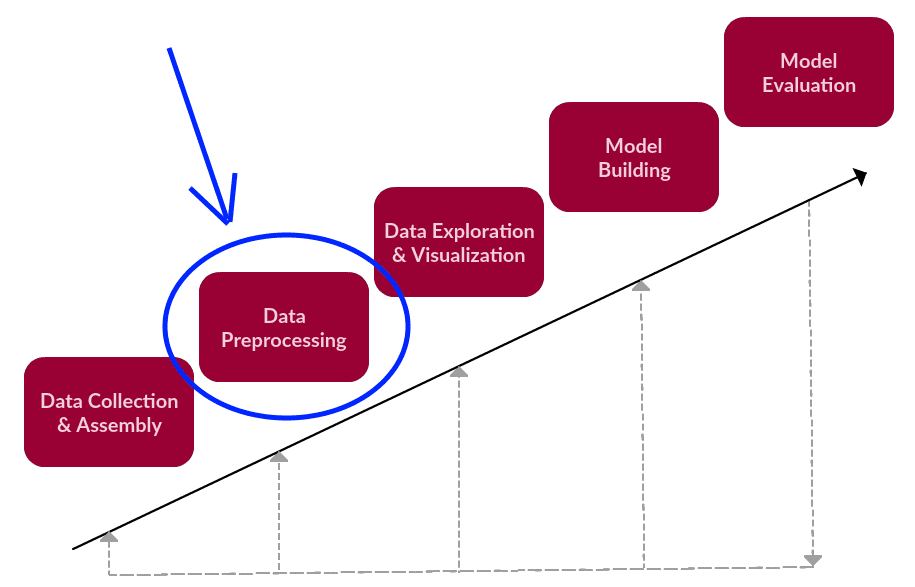

# Topics:

- [ ] Importing the libraries
- [ ] Importing the dataset
- [ ] Missing values
- [ ] Encoding categorical data
- - [ ] Encoding the Independent Variable
- - [ ] Encoding the Dependent Variable
- [ ] Splitting the dataset into the Training set and Test set
- [ ] Feature Scaling

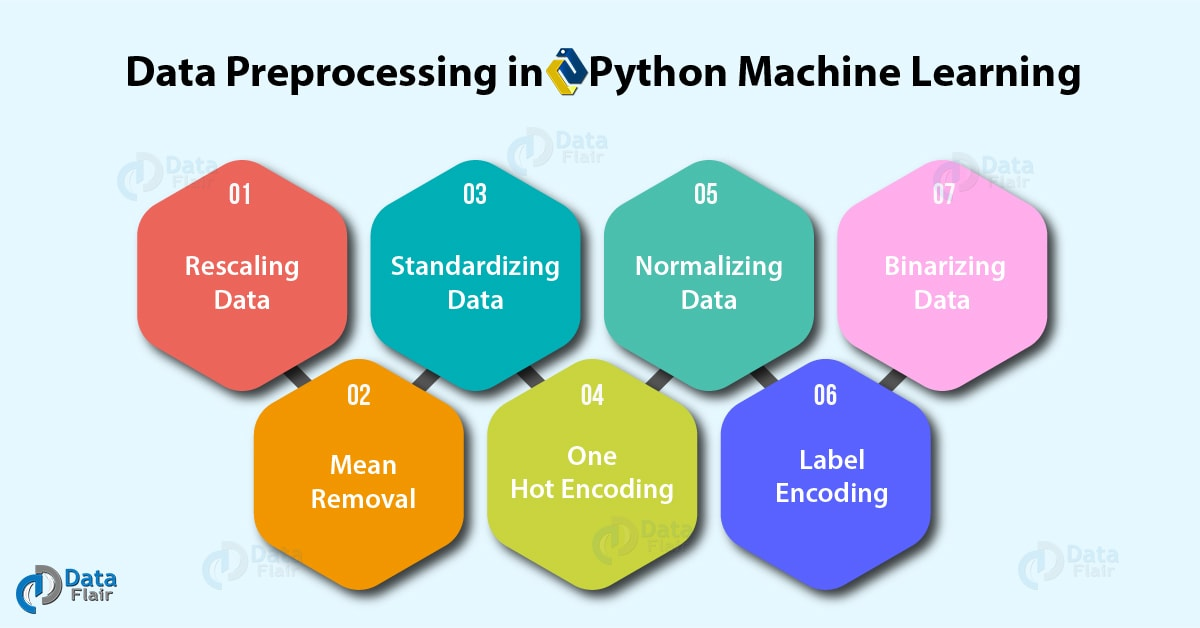

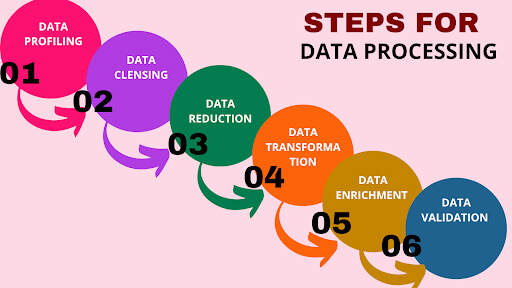

# Importing Libraries

In [715]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# importing Dataset 

## (Solution 1)

In [716]:
df = pd.read_csv('./Data.csv')

In [717]:
df

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes

In [718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [719]:
z = df.iloc[:, :-1]
z

Country   Age   Salary
0   France  44.0  72000.0
1    Spain  27.0  48000.0
2  Germany  30.0  54000.0
3    Spain  38.0  61000.0
4  Germany  40.0      NaN
5   France  35.0  58000.0
6    Spain   NaN  52000.0
7   France  48.0  79000.0
8  Germany  50.0  83000.0
9   France  37.0  67000.0

In [720]:
print(type(z))
print(type(z.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [721]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [722]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [723]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## (Solution 2)

In [724]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [725]:
X = df[['Country', 'Age', 'Salary']]
y = df ['Purchased']

In [726]:
X

Country   Age   Salary
0   France  44.0  72000.0
1    Spain  27.0  48000.0
2  Germany  30.0  54000.0
3    Spain  38.0  61000.0
4  Germany  40.0      NaN
5   France  35.0  58000.0
6    Spain   NaN  52000.0
7   France  48.0  79000.0
8  Germany  50.0  83000.0
9   France  37.0  67000.0

In [727]:
y

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object

---
# Missing Values

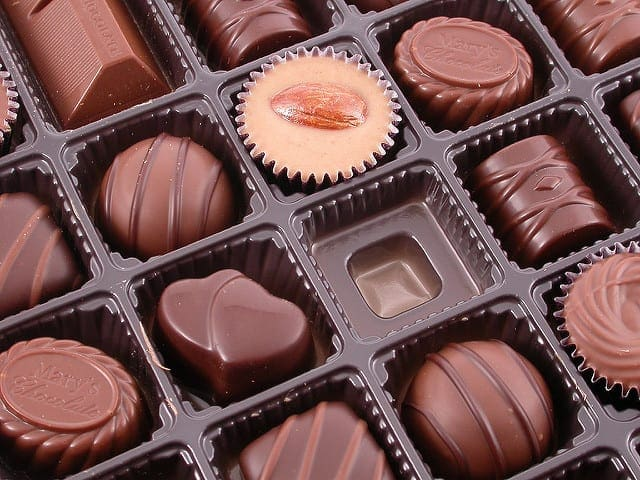

### Sources of Missing Values

Before we dive into code, it’s important to understand the sources of missing data. Here’s some typical reasons why data is missing:

* User forgot to fill in a field.
* Data was lost while transferring manually from a legacy database.
* There was a programming error.
* Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

In [728]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

## (Solution 1) Pandas (dropna)

In [729]:
df_dropna = df.copy()

In [730]:
# summarize the shape of the raw data
print("Before Dropna:",df_dropna.shape)

# drop rows with missing values
df_dropna.dropna(inplace=True)

# summarize the shape of the data with missing rows removed
print("After Dropna:",df_dropna.shape)

Before Dropna: (10, 4)
After Dropna: (8, 4)


## (Solution 2) Pandas (fillna)

In [731]:
df_fillna = df.copy()

In [732]:
df_fillna

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes

In [733]:
# fill missing values with mean column values
df_fillna.fillna(df_fillna[['Age', 'Salary']].mean(), inplace=True)

# count the number of NaN values in each column
print(df_fillna.isnull().sum())

df_fillna

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64


Country        Age        Salary Purchased
0   France  44.000000  72000.000000        No
1    Spain  27.000000  48000.000000       Yes
2  Germany  30.000000  54000.000000        No
3    Spain  38.000000  61000.000000        No
4  Germany  40.000000  63777.777778       Yes
5   France  35.000000  58000.000000       Yes
6    Spain  38.777778  52000.000000        No
7   France  48.000000  79000.000000       Yes
8  Germany  50.000000  83000.000000        No
9   France  37.000000  67000.000000       Yes

## (Solution 3) Scikit-learn (SimpleImputer)

The scikit-learn library provides the SimpleImputer pre-processing class that can be used to replace missing values.

It is a flexible class that allows you to specify the value to replace (it can be something other than NaN) and the technique used to replace it (such as mean, median, or mode). The SimpleImputer class operates directly on the NumPy array instead of the DataFrame.

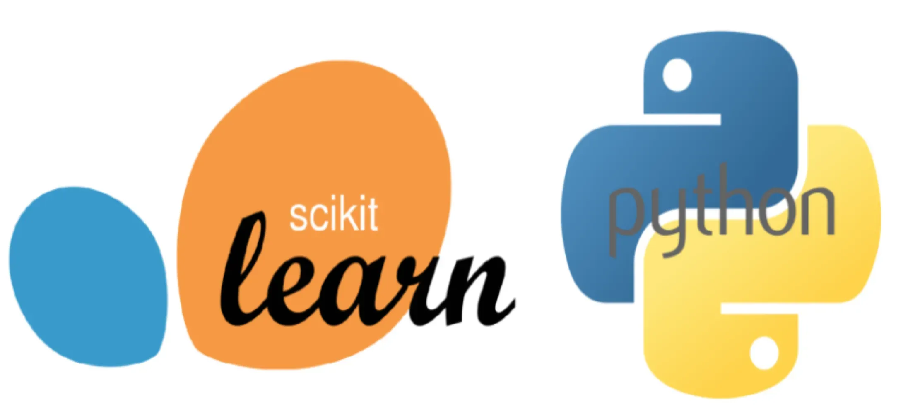

In [734]:
X

Country   Age   Salary
0   France  44.0  72000.0
1    Spain  27.0  48000.0
2  Germany  30.0  54000.0
3    Spain  38.0  61000.0
4  Germany  40.0      NaN
5   France  35.0  58000.0
6    Spain   NaN  52000.0
7   France  48.0  79000.0
8  Germany  50.0  83000.0
9   France  37.0  67000.0

In [735]:
from sklearn.impute import SimpleImputer

# missing_values : int, float, str, np.nan, None or pandas.NA, default=np.nan
# Strategies: mean, median, most_frequent, constant
# Note: when strategy=='constant', fill_value is used to replace all occurrences of missing_values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X.iloc[:, 1:3])
X.iloc[:, 1:3] = imputer.transform(X.iloc[:, 1:3])
# X[:, 1:3] = imputer.fit_transform(X[:, 1:3])

In [736]:
X

Country        Age        Salary
0   France  44.000000  72000.000000
1    Spain  27.000000  48000.000000
2  Germany  30.000000  54000.000000
3    Spain  38.000000  61000.000000
4  Germany  40.000000  63777.777778
5   France  35.000000  58000.000000
6    Spain  38.777778  52000.000000
7   France  48.000000  79000.000000
8  Germany  50.000000  83000.000000
9   France  37.000000  67000.000000

---
## Train-Test Split & Encoding – Best Practices

### 1. Why Train-Test Split Comes First
The test set represents **unseen future data**.  
Any operation that **learns from data (`fit`)** must be performed **only on the training set** to avoid data leakage.

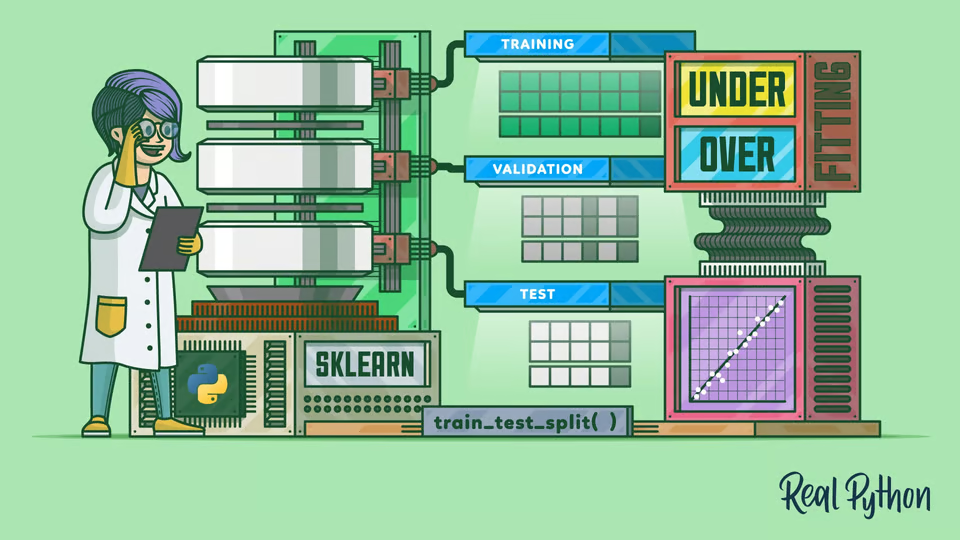

## Step 1: Train-Test Split

Always split the data **before encoding or scaling**.

In [737]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [738]:
X_train

Country        Age        Salary
5   France  35.000000  58000.000000
0   France  44.000000  72000.000000
7   France  48.000000  79000.000000
2  Germany  30.000000  54000.000000
9   France  37.000000  67000.000000
4  Germany  40.000000  63777.777778
3    Spain  38.000000  61000.000000
6    Spain  38.777778  52000.000000

In [739]:
X_test

Country   Age   Salary
8  Germany  50.0  83000.0
1    Spain  27.0  48000.0

In [740]:
y_train

5    Yes
0     No
7    Yes
2     No
9    Yes
4    Yes
3     No
6     No
Name: Purchased, dtype: object

In [741]:
y_test

8     No
1    Yes
Name: Purchased, dtype: object


---

## Step 2: Encoding Input Features (X)

### Option A: OneHotEncoder (Recommended)

- Fit only on training data
- Transform both training and test data
- Safe for unseen categories

In [742]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Encode categorical features; drop the first dummy column to avoid multicollinearity.
# Recommended for linear/logistic models; not needed for tree-based models (RF, XGBoost, etc.)
# encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(exclude='object').columns

X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat  = encoder.transform(X_test[cat_cols])

X_train_num = X_train[num_cols].values
X_test_num  = X_test[num_cols].values

X_train_enc = np.hstack([X_train_num, X_train_cat])
X_test_enc  = np.hstack([X_test_num, X_test_cat])

In [743]:
X_train_enc

array([[3.50000000e+01, 5.80000000e+04, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.40000000e+01, 7.20000000e+04, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.80000000e+01, 7.90000000e+04, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [3.00000000e+01, 5.40000000e+04, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [3.70000000e+01, 6.70000000e+04, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.00000000e+01, 6.37777778e+04, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [3.80000000e+01, 6.10000000e+04, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [3.87777778e+01, 5.20000000e+04, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00]])

In [744]:
X_test_enc

array([[5.0e+01, 8.3e+04, 0.0e+00, 1.0e+00, 0.0e+00],
       [2.7e+01, 4.8e+04, 0.0e+00, 0.0e+00, 1.0e+00]])

## One-Hot Encoding: Drop or Keep Dummy Columns?

After One-Hot Encoding (using OneHotEncoder or pd.get_dummies), whether to drop one dummy column depends on the model.

- **Linear / Logistic Regression** → ❗ Drop one column per categorical feature  
  (avoid multicollinearity / dummy variable trap)

- **Tree-based models (RandomForest, XGBoost, LightGBM)** → ✅ Keep all columns  
  (tree models are not affected by linear dependency)

**Rule of thumb:**
> Linear models → drop one dummy column  
> Tree models → keep all columns

---

## Feature Names After Encoding (Optional)

Models do not require feature names, but keeping them is useful for interpretation and debugging.

In [745]:
encoded_feature_names = encoder.get_feature_names_out(cat_cols)
all_feature_names = list(num_cols) + list(encoded_feature_names)

X_train_enc_df = pd.DataFrame(X_train_enc, columns=all_feature_names)
X_test_enc_df  = pd.DataFrame(X_test_enc, columns=all_feature_names)

In [746]:
X_train_enc_df

Age        Salary  Country_France  Country_Germany  Country_Spain
0  35.000000  58000.000000             1.0              0.0            0.0
1  44.000000  72000.000000             1.0              0.0            0.0
2  48.000000  79000.000000             1.0              0.0            0.0
3  30.000000  54000.000000             0.0              1.0            0.0
4  37.000000  67000.000000             1.0              0.0            0.0
5  40.000000  63777.777778             0.0              1.0            0.0
6  38.000000  61000.000000             0.0              0.0            1.0
7  38.777778  52000.000000             0.0              0.0            1.0

In [747]:
X_test_enc_df

Age   Salary  Country_France  Country_Germany  Country_Spain
0  50.0  83000.0             0.0              1.0            0.0
1  27.0  48000.0             0.0              0.0            1.0

---

### Option B: pd.get_dummies (EDA / Learning)

In [748]:
cat_cols = X_train.select_dtypes(include='object').columns

X_train = pd.get_dummies(X_train, columns=cat_cols)
X_test  = pd.get_dummies(X_test, columns=cat_cols)

# One-Hot Encode categorical columns.
# Use drop_first=True to avoid multicollinearity for linear/logistic models.
# For tree-based models, keeping all columns is fine.
# X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
# X_test  = pd.get_dummies(X_test, columns=cat_cols)

# Align test columns with train columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [749]:
X_train

Age        Salary  Country_France  Country_Germany  Country_Spain
5  35.000000  58000.000000            True            False          False
0  44.000000  72000.000000            True            False          False
7  48.000000  79000.000000            True            False          False
2  30.000000  54000.000000           False             True          False
9  37.000000  67000.000000            True            False          False
4  40.000000  63777.777778           False             True          False
3  38.000000  61000.000000           False            False           True
6  38.777778  52000.000000           False            False           True

In [750]:
X_test

Age   Salary  Country_France  Country_Germany  Country_Spain
8  50.0  83000.0               0             True          False
1  27.0  48000.0               0            False           True


---

## Step 3: Handling the Target Variable (y)

### Binary Classification
If `y` is already numeric (e.g. `0` and `1`):

In [751]:
y_train = y_train.values
y_test  = y_test.values

✔ No encoding needed

---

### Multiclass Classification (String Labels)

In [752]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

In [753]:
y_train_enc

array([1, 0, 1, 0, 1, 1, 0, 0])

In [754]:
y_test_enc

array([0, 1])

⚠️ Fit the encoder **only on training labels**

---

### Regression
If `y` is numeric and continuous:

✔ No encoding required

---

## Key Rules to Remember

- **Split before encoding**
- **Fit encoders only on training data**
- **Never one-hot encode the target variable**
- **y should always be a single numeric column**

---

## Quick Summary

| Data | Encoding |
|----|----|
| X categorical | OneHotEncoder / get_dummies |
| y binary (0/1) | None |
| y multiclass (text) | LabelEncoder |
| y regression | None |

---

## Rule of Thumb

```text
EDA → Any order is fine
Modeling → Split → Encode X → Encode y → Train
```

---
# Feature Scaling

Feature Scaling or Standardization: It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

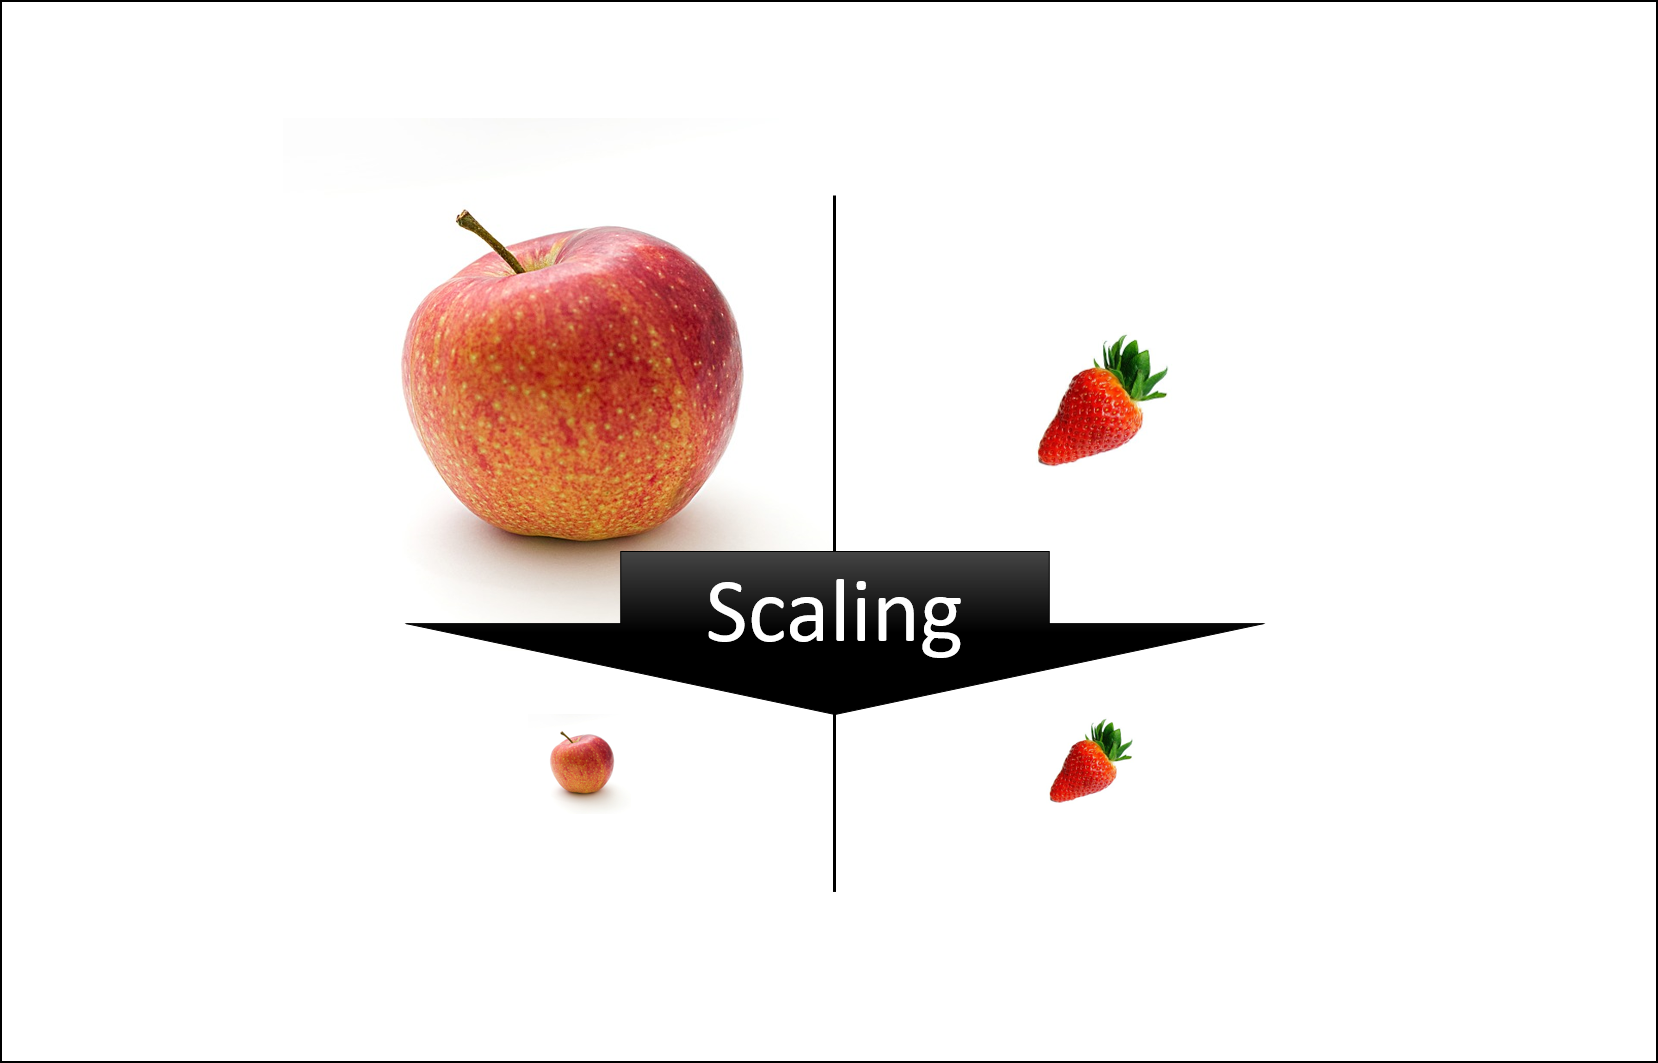

1) Min Max Scaler (Normalization)

2) Standard Scaler

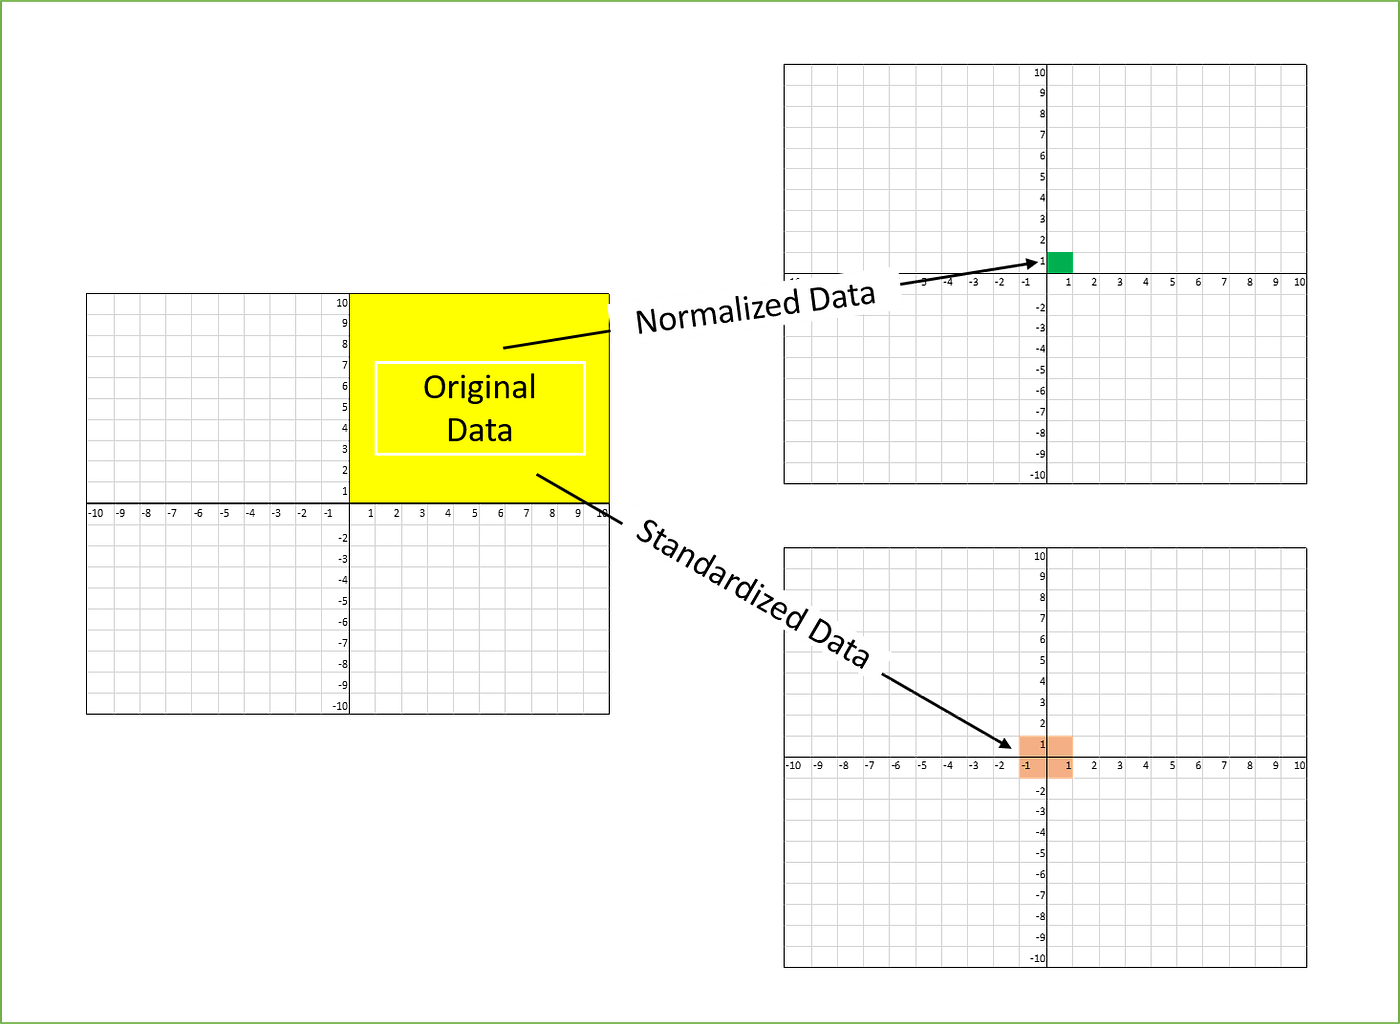

Another reason why feature scaling is applied is that few algorithms like gradient descent converge much faster with feature scaling than without it.

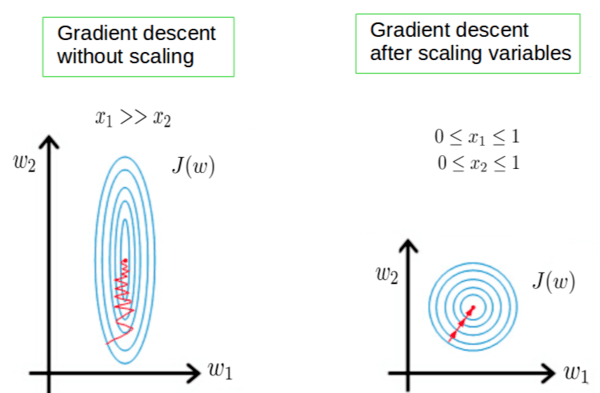

## (Solution 1) Scikit-learn (MinMaxScaler)

In [755]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train.iloc[:, 3:] = mm.fit_transform(X_train.iloc[:, 3:])
X_test.iloc[:, 3:] = mm.transform(X_test.iloc[:, 3:])

## (Solution 2) Scikit-learn (StandardScaler)

In [756]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, 3:] = sc.fit_transform(X_train.iloc[:, 3:])
X_test.iloc[:, 3:] = sc.transform(X_test.iloc[:, 3:])

In [757]:
X_train

Age        Salary  Country_France  Country_Germany  Country_Spain
5  35.000000  58000.000000            True        -0.577350      -0.577350
0  44.000000  72000.000000            True        -0.577350      -0.577350
7  48.000000  79000.000000            True        -0.577350      -0.577350
2  30.000000  54000.000000           False         1.732051      -0.577350
9  37.000000  67000.000000            True        -0.577350      -0.577350
4  40.000000  63777.777778           False         1.732051      -0.577350
3  38.000000  61000.000000           False        -0.577350       1.732051
6  38.777778  52000.000000           False        -0.577350       1.732051

In [758]:
X_test

Age   Salary  Country_France  Country_Germany  Country_Spain
8  50.0  83000.0               0         1.732051      -0.577350
1  27.0  48000.0               0        -0.577350       1.732051

## When to use feature Scaling ...

1. Gradient Descent:

Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Take a look at the formula for gradient descent below:

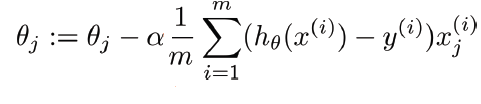

The presence of feature value X in the formula will affect the step size of the gradient descent. The difference in ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.

> Having features on a similar scale can help the gradient descent converge more quickly towards the minima.

2. Distance-Based Algorithms:

Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Since both the features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.

> Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.

3. Tree-Based Algorithms: 

Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Think about it, a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features.

So, there is virtually no effect of the remaining features on the split. This is what makes them invariant to the scale of the features!

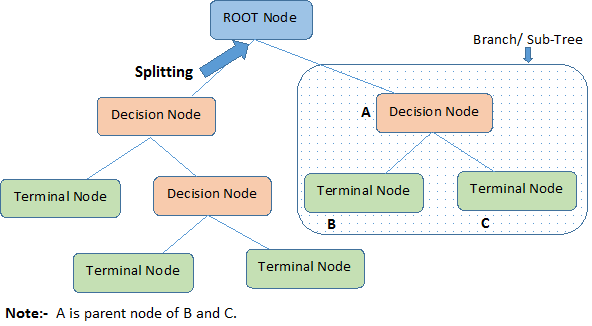

### What is Normalization?

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

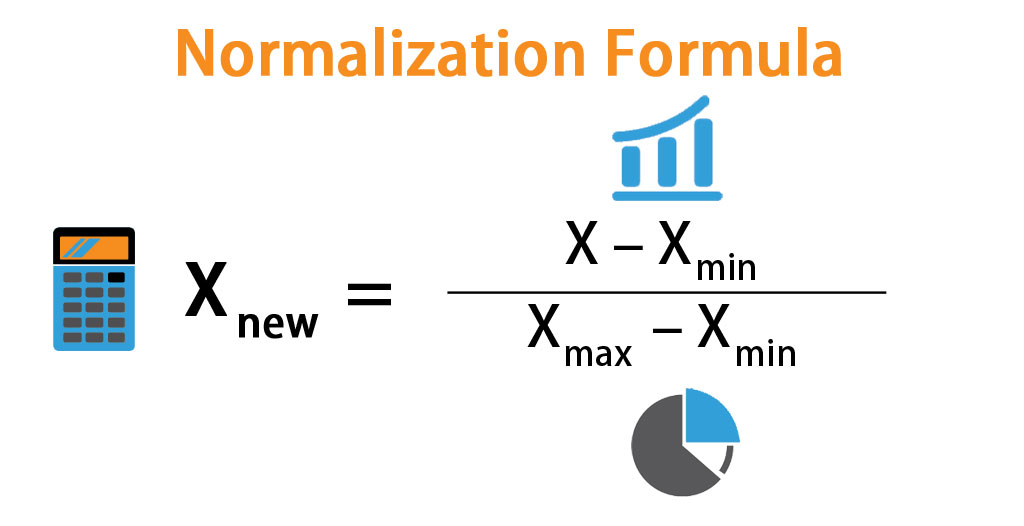

### What is Standardization?

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

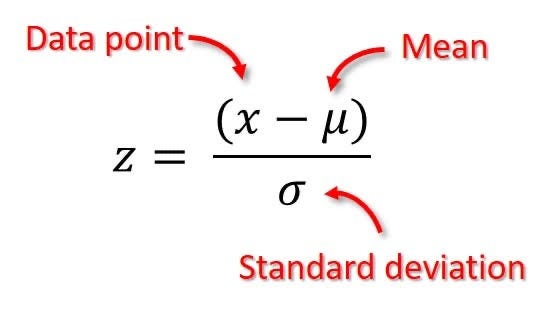

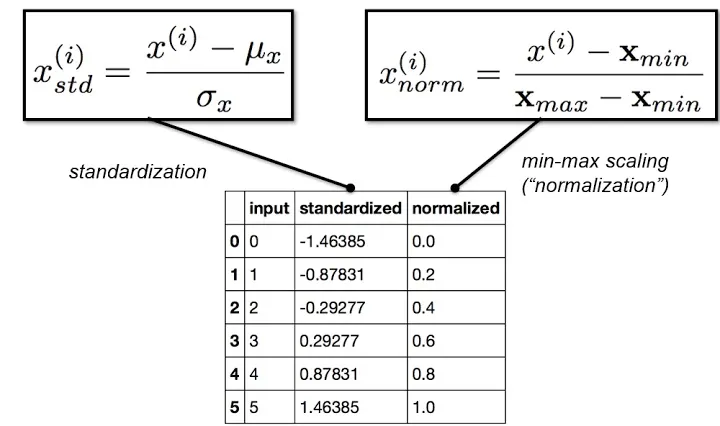